<a href="https://colab.research.google.com/github/patrickanaku/mcsc-deep-learning/blob/main/Semester_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Path to your metadata file in Google Drive
metadata_path = '/content/drive/MyDrive/MCSC1/Semester 2/Deep Learning/Semester Project/Dataset/ddi/ddi_metadata.csv'
image_folder = '/content/drive/MyDrive/MCSC1/Semester 2/Deep Learning/Semester Project/Dataset/ddi'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Import necessary libraries

In [ ]:
!pip install torch torchvision torchaudio
!pip install matplotlib seaborn pandas opencv-python scikit-learn

Exploratory Data Analysis (EDA)

Load the Dataset: Load the metadata CSV file and inspect its structure.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

metadata = pd.read_csv(metadata_path) # Load metadata
# print(metadata.head()) # Display first few rows
print(metadata.isnull().sum()) # Check for missing values
print(metadata.describe()) # Basic statistics

Unnamed: 0    0
DDI_ID        0
DDI_file      0
skin_tone     0
malignant     0
disease       0
dtype: int64
       Unnamed: 0      DDI_ID   skin_tone
count  656.000000  656.000000  656.000000
mean   327.500000  328.500000   33.966463
std    189.515171  189.515171   17.511578
min      0.000000    1.000000   12.000000
25%    163.750000  164.750000   12.000000
50%    327.500000  328.500000   34.000000
75%    491.250000  492.250000   56.000000
max    655.000000  656.000000   56.000000


In [ ]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  656 non-null    int64 
 1   DDI_ID      656 non-null    int64 
 2   DDI_file    656 non-null    object
 3   skin_tone   656 non-null    int64 
 4   malignant   656 non-null    bool  
 5   disease     656 non-null    object
dtypes: bool(1), int64(3), object(2)
memory usage: 26.4+ KB


Class Distribution

Check the distribution of classes in the dataset.

<ipython-input-4-d2517e501952>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


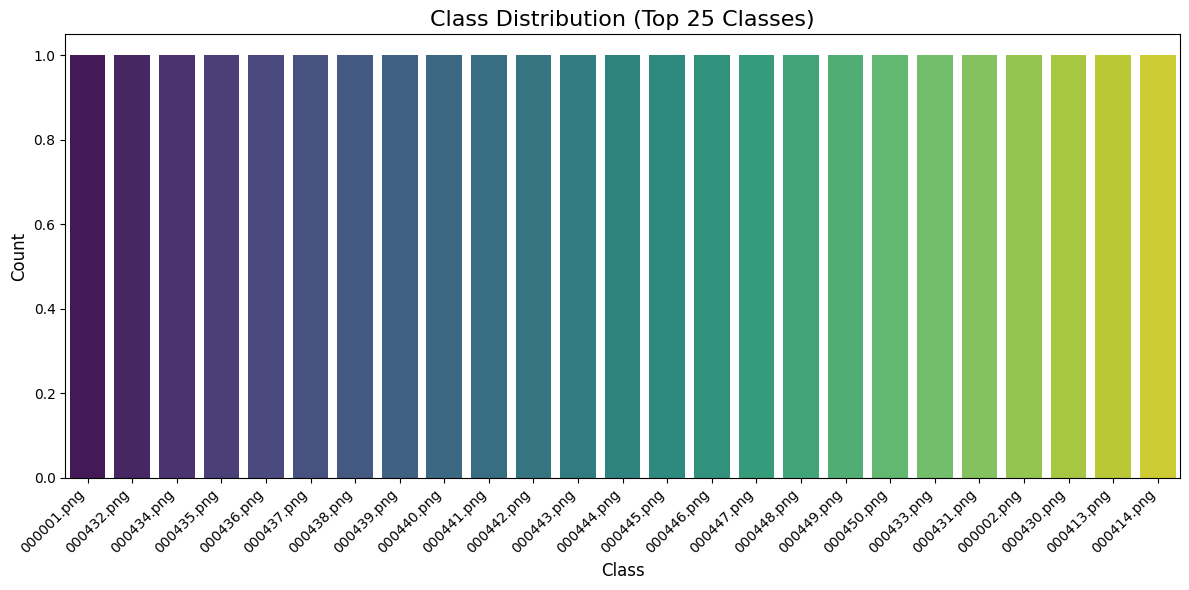

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

n = 25  # Number of top classes to display

# Get the counts of each class and select the top 'n'
top_classes = metadata['DDI_file'].value_counts().head(n).index

# Filter the DataFrame to include only the top 'n' classes
filtered_metadata = metadata[metadata['DDI_file'].isin(top_classes)]

# Create the countplot with enhanced aesthetics
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.countplot(
    data=filtered_metadata,
    x='DDI_file',
    order=top_classes,  # Order bars by frequency
    palette="viridis",  # Use a visually appealing color palette
)
plt.title('Class Distribution (Top {} Classes)'.format(n), fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Image Analysis

Analyze the images to understand their properties.

Class: 000531.png


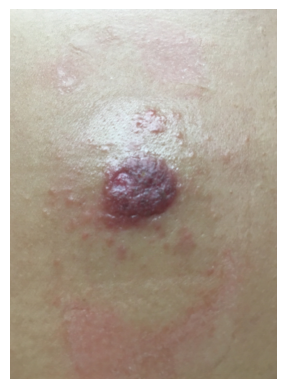

Class: 000605.png


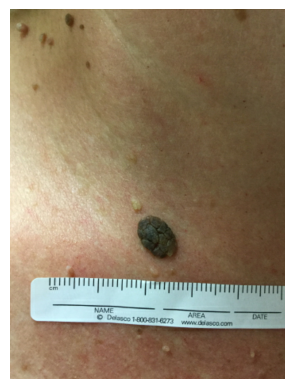

Class: 000283.png


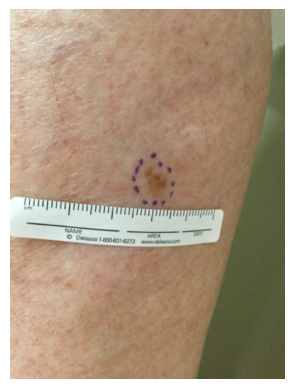

Class: 000174.png


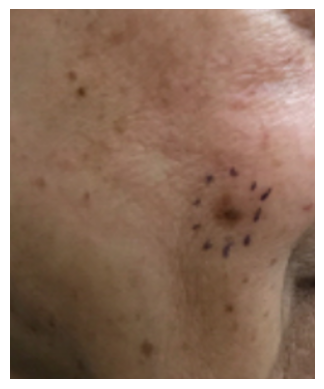

Class: 000521.png


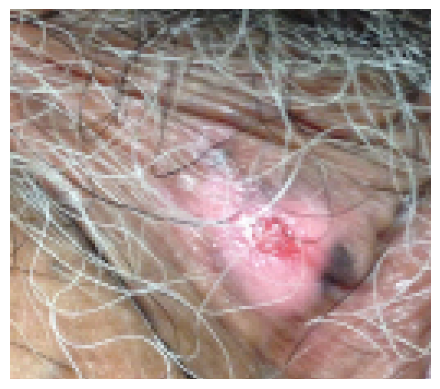

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# Load a few images and display them

n = 5
# Assuming 'image_file' is the correct column name
sample_images = metadata.sample(n)['DDI_file'].tolist()

for image_name in sample_images:
    image_path = os.path.join(image_folder, image_name)
    image = cv2.imread(image_path)

    # Check if image was successfully loaded
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization
        print(f'Class: {metadata[metadata["DDI_file"] == image_name]["DDI_file"].values[0]}') # Assuming 'DDI_file' is the class column

        # Display the image using matplotlib
        plt.imshow(image)
        plt.axis('off')  # Hide axes for a cleaner display
        plt.show()
    else:
        print(f"Error loading image: {image_path}")


Image Size Distribution: Check the distribution of image sizes.

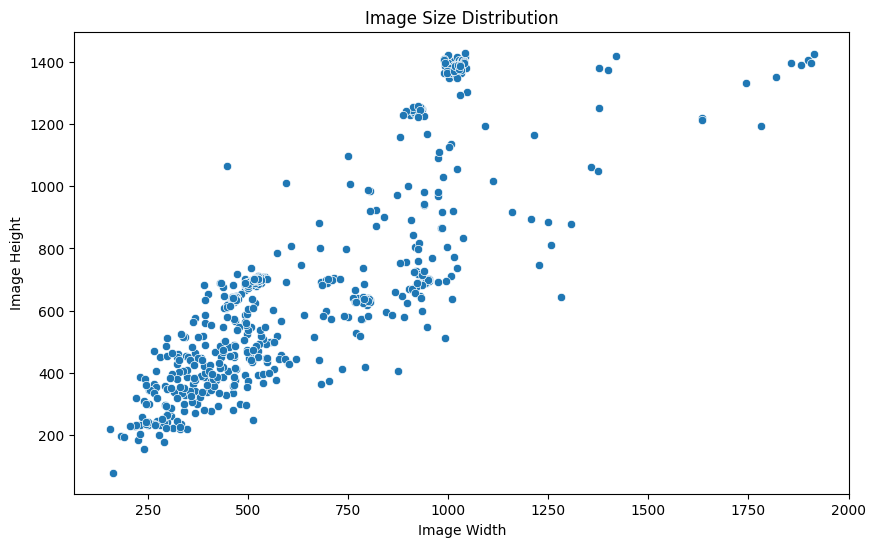

In [ ]:
import os
import cv2
import concurrent.futures
import matplotlib.pyplot as plt
import seaborn as sns

def get_image_shape(image_name):
    image_path = os.path.join(image_folder, image_name)
    image = cv2.imread(image_path)
    return image.shape if image is not None else (0, 0, 0)  # Return default shape if image is None

# Use ThreadPoolExecutor to parallelize loading image shapes. Batching Image Processing
with concurrent.futures.ThreadPoolExecutor() as executor:
    image_sizes = list(executor.map(get_image_shape, metadata['DDI_file']))

# Plot image size distribution
widths = [size[1] for size in image_sizes]
heights = [size[0] for size in image_sizes]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=widths, y=heights)
plt.title('Image Size Distribution')
plt.xlabel('Image Width')
plt.ylabel('Image Height')
plt.show()


3. Pre-processing

Resize and Normalize Images

Resize images to a consistent size and normalize pixel values. Visualize images before and after applying transformation.

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
from torchvision import transforms
import torch

# Define transformations
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),  # Convert to tensor and scale to [0, 1]
    # Normalize using ImageNet stats
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Number of images to display
n = 4  # Can be adjusted to a number > 4 to transform all

# Get sample images (ensure metadata is defined)
if n > 3:
    sample_images = metadata['DDI_file'].tolist()  # Transform all images if n > 5
else:
    sample_images = metadata.sample(n)['DDI_file'].tolist()  # Sample 'n' images

# Determine the number of images to process and display
num_images_to_display = n if n <= 3 else len(sample_images)

# Create a figure and axes for the plots, using num_images_to_display
fig, axes = plt.subplots(num_images_to_display, 2, figsize=(10, 5 * num_images_to_display))

# Batch processing: Load and transform images in batches
batch_size = 64  # Define your desired batch size
transformed_images = []
for i in range(0, len(sample_images), batch_size):
    batch_images = sample_images[i : i + batch_size]

    # Load images in the batch
    images = [cv2.imread(os.path.join(image_folder, image_name)) for image_name in batch_images]
    images = [img for img in images if img is not None] # Filter out None values

    # Apply transformations to the batch
    batch_transformed_images = [transform(image) for image in images]
    transformed_images.extend(batch_transformed_images)

# Display original and transformed images (up to num_images_to_display)
for i, (image_name, transformed_image) in enumerate(zip(sample_images, transformed_images)):
    if i >= num_images_to_display:
        break

    image_path = os.path.join(image_folder, image_name)
    original_image = cv2.imread(image_path)  # Load original image for display

    if original_image is not None:
        # Convert to RGB for visualization
        image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

        # Display original image, ensure i is within bounds of axes
        axes[i, 0].imshow(image_rgb)
        axes[i, 0].set_title(f"Original - {image_name}")
        axes[i, 0].axis('off')

        # Convert transformed image back to displayable format
        transformed_image_disp = transformed_image.permute(1, 2, 0).numpy()  # Convert to HWC format
        transformed_image_disp = transformed_image_disp * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]  # Denormalize
        transformed_image_disp = transformed_image_disp.clip(0, 1)  # Clamp to [0, 1] to avoid overflow
        transformed_image_disp = (transformed_image_disp * 255).astype('uint8')  # Convert back to uint8

        # Display transformed image, ensure i is within bounds of axes
        axes[i, 1].imshow(transformed_image_disp)
        axes[i, 1].set_title(f"Transformed - {image_name}")
        axes[i, 1].axis('off')
    else:
        print(f"Error loading image: {image_path}")

plt.tight_layout()
plt.show()

Create a Custom Dataset

Create a PyTorch dataset to load images and labels.

In [ ]:
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

class DermatologyDataset(Dataset):
    def __init__(self, metadata, image_folder, transform=None):
        self.metadata = metadata
        self.image_folder = image_folder
        self.transform = transform

    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, idx):
        image_name = self.metadata.iloc[idx]['DDI_file']
        # Convert label to numerical index to allow moved PyTorch tensors to a
        # specific device (e.g., CPU or GPU)
        label = self.metadata['DDI_file'].unique().tolist().index(image_name)
        image_path = os.path.join(self.image_folder, image_name)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
        if self.transform:
            image = self.transform(image)
        return image, torch.tensor(label)  # Convert label to tensor

# Split the metadata into train, validation, and test sets
train_df, temp_df = train_test_split(metadata, test_size=0.3, random_state=42) # Split 70% for training
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42) # Split remaining 30% equally for validation and testing


# Create datasets
train_dataset = DermatologyDataset(train_df, image_folder, transform=transform)
val_dataset = DermatologyDataset(val_df, image_folder, transform=transform)
test_dataset = DermatologyDataset(test_df, image_folder, transform=transform)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

4. Model Building

Deformable Convolutional Layers

Use deformable convolutional layers from libraries like torchvision.ops.deform_conv2d.

In [ ]:
import torch
import torch.nn as nn
import torchvision.ops as ops

class DeformableConvNet(nn.Module):
    def __init__(self):
        super(DeformableConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.deform_conv1 = ops.DeformConv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU(inplace=True)
        # Add a regular convolution to generate the offset
        self.offset_conv = nn.Conv2d(64, 2 * 3 * 3, kernel_size=3, padding=1) # 2*3*3 for 3x3 kernel with 2 offsets (x, y)

    def forward(self, x):
        x = self.conv1(x)
        # Generate offset using a separate convolution layer
        offset = self.offset_conv(x)
        x = self.deform_conv1(x, offset) # Pass the offset to deform_conv1
        x = self.relu(x)
        return x

Attention Mechanisms

Incorporate self-attention mechanism or squeeze-and-excitation blocks. Here I use self-attention.

In [ ]:
class AttentionBlock(nn.Module):
    def __init__(self, in_channels):
        super(AttentionBlock, self).__init__()
        self.global_pool = nn.AdaptiveAvgPool2d(1)
        self.fc1 = nn.Linear(in_channels, in_channels // 8)
        self.fc2 = nn.Linear(in_channels // 8, in_channels)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.global_pool(x).view(b, c)
        y = self.fc1(y)
        y = self.fc2(y)
        y = self.sigmoid(y).view(b, c, 1, 1)
        return x * y

Full Model

Combine deformable convolutions and attention mechanisms.

In [ ]:
class InterpretableCNN(nn.Module):
    def __init__(self, num_classes): # Add num_classes as an argument
        super(InterpretableCNN, self).__init__()
        self.deform_conv_net = DeformableConvNet()
        self.attention_block = AttentionBlock(64)
        # Replace num_classes with the number of classes in your dataset
        self.fc = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.deform_conv_net(x)
        x = self.attention_block(x)
        x = x.mean([2, 3])  # Global average pooling
        x = self.fc(x)
        return x

Training and Evaluation

Training Loop

Train the model using PyTorch.

In [ ]:
# Determine the number of classes in your dataset
# (e.g., by checking the unique values in your 'label' column)
num_classes = len(metadata['DDI_file'].unique()) # Replace with the way you are getting your labels

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = InterpretableCNN(num_classes).to(device) # Pass num_classes during instantiation
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(2):  # Replace 10 with the desired number of epochs
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

Epoch 1, Loss: 6.558946132659912
Epoch 2, Loss: 6.372735977172852


Evaluation

Evaluate the model on the test set.

In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

Test Accuracy: 0.00%


Visualization of Results

Grad-CAM for Interpretability

Use Grad-CAM to visualize which parts of the image the model is focusing on.

# Refer to PyTorch Grad-CAM implementations like https://github.com/jacobgil/pytorch-grad-cam

Confusion Matrix

Generate a confusion matrix for classification performance.

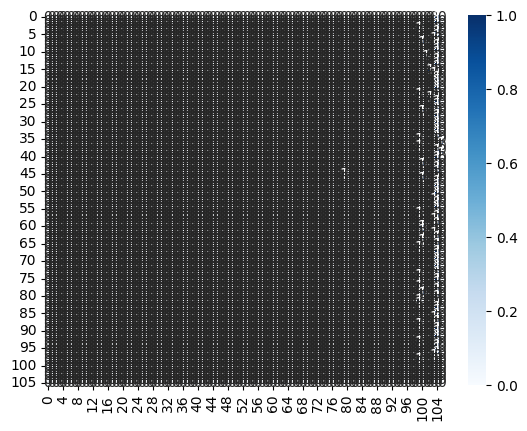

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

(loss and accuracy over epochs

In [ ]:
import torch
import torch.nn as nn
import torchvision.ops as ops
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
# Assuming DermatologyDataset, InterpretableCNN are defined as before

# ... (Your previous code: DermatologyDataset, InterpretableCNN, etc.) ...

# Determine the number of classes in your dataset
num_classes = len(metadata['DDI_file'].unique())

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = InterpretableCNN(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Lists to store training loss and accuracy values
train_losses = []
train_accuracies = []

num_epochs = 2 # Replace with the desired number of epochs

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = total_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

# Plotting the training graph
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/2, Loss: 6.5161, Accuracy: 0.00%


Interpretability using Grad-CAM

In [ ]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 73.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.4-py3-none-any.whl size=39648 sha256=8feebad42f0d5e13e97712a4587cf88ed8800f116fcbf61e39fa879bdf9a3640
  Stored in directory: /root/.cache/pip/wheels/8b/0d/d2/b12bec1ccc028921fb98158042ade2d19dae73925dfc636954
Successfully built grad-cam


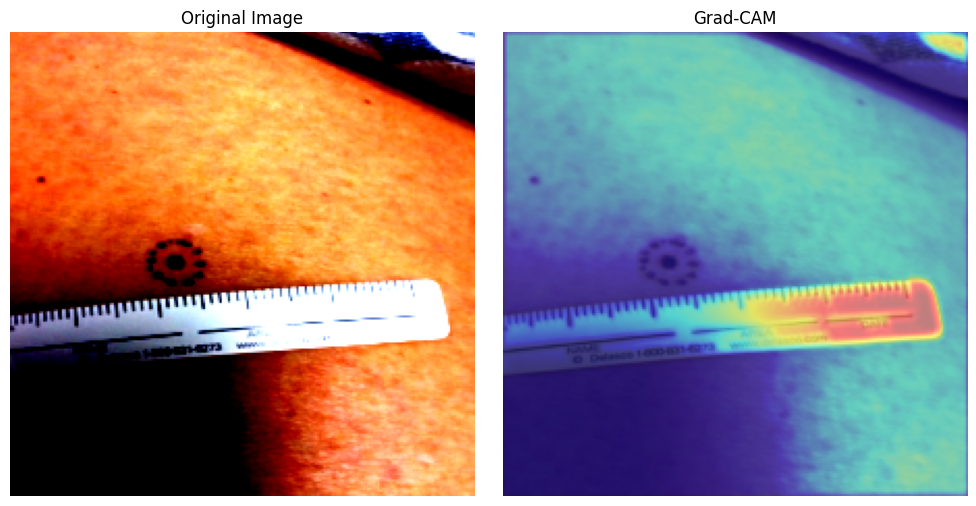

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import torch
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam import GradCAM  # Import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

# ... (Your previous code: DermatologyDataset, InterpretableCNN, etc.) ...

# Choose the target layer for Grad-CAM (usually the last convolutional layer)
target_layer = model.deform_conv_net.deform_conv1  # Example: Replace with your actual layer

# Create a GradCAM object
# Remove use_cuda argument
cam = GradCAM(model=model, target_layers=[target_layer])

# If you want to use CUDA, move the model to the appropriate device beforehand:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# Get a sample image and label from your test dataset
image, label = next(iter(test_loader))
image = image[0].unsqueeze(0).to(device)  # Take the first image from the batch and move it to the device

# Get the predicted class
output = model(image)
_, predicted_class = torch.max(output, 1)

# Generate the Grad-CAM heatmap
# Specify the target category using ClassifierOutputTarget
targets = [ClassifierOutputTarget(predicted_class.item())]
grayscale_cam = cam(input_tensor=image, targets=targets)

# Convert the grayscale heatmap to RGB
grayscale_cam = grayscale_cam[0, :]  # Take the first element from the batch

# Denormalize the image before passing it to show_cam_on_image
# Assuming your normalization parameters are mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
# Convert the image to numpy and move to CPU
img_np = image.cpu().squeeze().permute(1, 2, 0).numpy()
# Denormalize the image
img_np = img_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
# Clip values to be in the range [0, 1]
img_np = np.clip(img_np, 0, 1)

visualization = show_cam_on_image(img_np, grayscale_cam, use_rgb=True)

# Display the original and Grad-CAM visualizations
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image.cpu().squeeze().permute(1, 2, 0).numpy())  # Original image
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(visualization)  # Grad-CAM visualization
plt.title('Grad-CAM')
plt.axis('off')

plt.tight_layout()
plt.show()

SHAP for Model Interpretability

In [ ]:
!pip install shap

In [ ]:
import shap
import numpy as np

# ... (Your previous code: DermatologyDataset, InterpretableCNN, etc.) ...

# Choose the target layer for Grad-CAM (usually the last convolutional layer)
target_layer = model.deform_conv_net.deform_conv1  # Example: Replace with your actual layer

# Create a GradCAM object
# Remove use_cuda argument
cam = GradCAM(model=model, target_layers=[target_layer])

# If you want to use CUDA, move the model to the appropriate device beforehand:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# Get a sample image and label from your test dataset
image, label = next(iter(test_loader))
image = image[0].unsqueeze(0).to(device)  # Take the first image from the batch and move it to the device

# Initialize the SHAP explainer
# using the model's prediction function and a sample of the training data
# (or a representative subset if the dataset is large)
# Assuming 'train_dataset' is your training dataset
background = train_dataset.metadata.sample(100)  # Sample 100 images for background
# Create a background dataset using the sampled metadata
background_dataset = DermatologyDataset(background, image_folder, transform=transform)
# Create a background dataloader
background_loader = DataLoader(background_dataset, batch_size=32, shuffle=False)

# Get a batch of background data
background_data, _ = next(iter(background_loader))
background_data = background_data.to(device)

# Create the explainer object using the model directly
# Pass the model and background data to DeepExplainer
explainer = shap.DeepExplainer(model, background_data) # Changed line

# Get the predicted class
output = model(image)
_, predicted_class = torch.max(output, 1)

# Generate SHAP values for the sample image
# reshaping the image to (1, channels, height, width)
# Move the image to the CPU and convert it to a NumPy array
shap_values = explainer.shap_values(image.cpu()) #


# Plot the SHAP values for the predicted class
# Pass the original image and SHAP values to image_plot
shap.image_plot(shap_values, image.cpu().detach().numpy())